#### Imports:

In [0]:
import csv
import re

In [3]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from keras import Input
from keras import layers
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.models import Model
from keras_preprocessing.sequence import pad_sequences
from nltk import WordPunctTokenizer
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from keras.preprocessing.text import Tokenizer
from tensorflow.python.estimator import keras
import tensorflow_estimator

Using TensorFlow backend.


#### Dictionaries:

In [0]:
def load_dict_smileys():
    return {
        ":‑)": "smiley",
        ":-]": "smiley",
        ":-3": "smiley",
        ":->": "smiley",
        "8-)": "smiley",
        ":-}": "smiley",
        ":)": "smiley",
        ":]": "smiley",
        ":3": "smiley",
        ":>": "smiley",
        "8)": "smiley",
        ":}": "smiley",
        ":o)": "smiley",
        ":c)": "smiley",
        ":^)": "smiley",
        "=]": "smiley",
        "=)": "smiley",
        ":-))": "smiley",
        ":‑D": "smiley",
        "8‑D": "smiley",
        "x‑D": "smiley",
        "X‑D": "smiley",
        ":D": "smiley",
        "8D": "smiley",
        "xD": "smiley",
        "XD": "smiley",
        ":‑(": "sad",
        ":‑c": "sad",
        ":‑<": "sad",
        ":‑[": "sad",
        ":(": "sad",
        ":c": "sad",
        ":<": "sad",
        ":[": "sad",
        ":-||": "sad",
        ">:[": "sad",
        ":{": "sad",
        ":@": "sad",
        ">:(": "sad",
        ":'‑(": "sad",
        ":'(": "sad",
        ":‑P": "playful",
        "X‑P": "playful",
        "x‑p": "playful",
        ":‑p": "playful",
        ":‑Þ": "playful",
        ":‑þ": "playful",
        ":‑b": "playful",
        ":P": "playful",
        "XP": "playful",
        "xp": "playful",
        ":p": "playful",
        ":Þ": "playful",
        ":þ": "playful",
        ":b": "playful",
        "<3": "love",
        "\o/": "cheer"
    }

# self defined contractions
def load_dict_contractions():
    return {
        "ain't": "is not",
        "amn't": "am not",
        "aren't": "are not",
        "b/c": "because",
        "can't": "cannot",
        "'cause": "because",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "could've": "could have",
        "cya": "see you",
        "daren't": "dare not",
        "daresn't": "dare not",
        "dasn't": "dare not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "e'er": "ever",
        "em": "them",
        "everyone's": "everyone is",
        "finna": "fixing to",
        "fml": "fuck my life",
        "fb": "facebook",
        "gimme": "give me",
        "gonna": "going to",
        "gon't": "go not",
        "gotta": "got to",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "he've": "he have",
        "how'd": "how would",
        "how'll": "how will",
        "how're": "how are",
        "how's": "how is",
        "I'd": "I would",
        "I'll": "I will",
        "I'm": "I am",
        "I'm'a": "I am about to",
        "I'm'o": "I am going to",
        "isn't": "is not",
        "it'd": "it would",
        "it'll": "it will",
        "it's": "it is",
        "I've": "I have",
        "kinda": "kind of",
        "let's": "let us",
        "lol": "laughing out loud",
        "mayn't": "may not",
        "may've": "may have",
        "mightn't": "might not",
        "might've": "might have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "must've": "must have",
        "needn't": "need not",
        "ne'er": "never",
        "nite": "night",
        "o'": "of",
        "o'er": "over",
        "ol'": "old",
        "oughtn't": "ought not",
        "rofl": "rolling on the floor laughing",
        "shalln't": "shall not",
        "shan't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "should've": "should have",
        "somebody's": "somebody is",
        "someone's": "someone is",
        "something's": "something is",
        "that'd": "that would",
        "that'll": "that will",
        "that're": "that are",
        "that's": "that is",
        "there'd": "there would",
        "there'll": "there will",
        "there're": "there are",
        "there's": "there is",
        "these're": "these are",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "this's": "this is",
        "those're": "those are",
        "'tis": "it is",
        "'twas": "it was",
        "u": "you",
        "w/": "with",
        "w/o": "without",
        "wanna": "want to",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we're": "we are",
        "weren't": "were not",
        "we've": "we have",
        "what'd": "what did",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "where'd": "where did",
        "where're": "where are",
        "where's": "where is",
        "where've": "where have",
        "which's": "which is",
        "who'd": "who would",
        "who'd've": "who would have",
        "who'll": "who will",
        "who're": "who are",
        "who's": "who is",
        "who've": "who have",
        "why'd": "why did",
        "why're": "why are",
        "why's": "why is",
        "won't": "will not",
        "wouldn't": "would not",
        "would've": "would have",
        "y'all": "you all",
        "ya": "you",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have",
        "Whatcha": "What are you",
        "luv": "love",
        "sux": "sucks"
    }

#### Supporting Classes:

In [0]:
class ExclaimTransformer(TransformerMixin):

    def transform(self, X, **transform_params):
        exclaims = pd.DataFrame(X.apply(lambda x: x.count("!")))
        return exclaims

    def fit(self, X, y=None, **fit_params):
        return self
    

In [0]:
class TimeOfDayTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        exclaims = pd.DataFrame(X.apply(lambda x: float(x.split(" ")[3].split(":")[0])))
        return exclaims

    def fit(self, X, y=None, **fit_params):
        return self
    

In [0]:
class ColumnExtractor(TransformerMixin):

    def __init__(self, col):
        self.col = col

    def transform(self, X):
        return X[self.col]

    def fit(self, X, y=None):
        return self

#### Supporting methods:

In [0]:
def tweet_cleaner(text, tags_removal=True, links_removal=True, transform_smilies=True, transform_contractions=True):
    remove_tags = r'@[A-Za-z0-9]+'
    remove_links = r'https?://[A-Za-z0-9./]+'
    remove_tags_and_links_re = r'|'.join((remove_tags, remove_links))
    # Discard any html stuff in tweets
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    # Remove tags and links
    if tags_removal and links_removal:
        stripped = re.sub(remove_tags_and_links_re, '', souped)
    elif tags_removal:
        stripped = re.sub(remove_tags, '', souped)
    elif links_removal:
        stripped = re.sub(remove_links, '', souped)
    else:
        stripped = souped

    try:
        # Remove weird characters
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped

    if transform_smilies:
        words = clean.split()
        reformed = [SMILEY[word] if word in SMILEY else word for word in words]
        words = " ".join(reformed)

    if transform_contractions:
        tweet = words.replace("’", "'")
        words = tweet.split()
        reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
        words = " ".join(reformed)

    lower_case = words.lower()
    # preprocessing has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tokenizer.tokenize(lower_case)
    return (" ".join(words)).strip()


In [0]:
def normalize_binary(x):
    if x == 4:
        return 1
    return 0

In [0]:
# 0 - negative, 1 - positive --< CALL THIS METHOD IN THE END OF gimel.
def explore_dataset(df):
    cvec = CountVectorizer(preprocessor=tweet_cleaner, stop_words=gensim.parsing.preprocessing.STOPWORDS)
    cvec.fit(df.text)
    neg_doc_matrix = cvec.transform(df[df.label == 0].text)
    pos_doc_matrix = cvec.transform(df[df.label == 1].text)
    neg_tf = np.sum(neg_doc_matrix, axis=0)
    pos_tf = np.sum(pos_doc_matrix, axis=0)
    
    #print class distribution
    print("Class distribution: (0- Negative, 1- Positive)")
    print(df['label'].value_counts())
    class_dist=df['label'].value_counts().rename_axis('sentiment').to_frame('count')
    labels = 'Positive', 'Negative', 'Natural'
    sizes = [class_dist.loc[1,'count'], class_dist.loc[0,'count'], 0]
    colors = ['gold', 'lightcoral', 'lightskyblue']
    explode = (0, 0, 0.1)  
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Class distribution')
    plt.show()

    #print terms frequency for the different sentiments
    neg = np.squeeze(np.asarray(neg_tf))
    pos = np.squeeze(np.asarray(pos_tf))
    term_freq_df = pd.DataFrame([neg, pos],
                                columns=cvec.get_feature_names()
                                ).transpose()
    term_freq_df.columns = ['negative', 'positive']
    term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
    term_freq_df.sort_values(by='total', ascending=False).iloc[:10]
    y_pos = np.arange(50)
    plt.figure(figsize=(12, 10))
    plt.bar(y_pos,
            term_freq_df.sort_values(by='negative', ascending=False)
            ['negative'][:50],
            align='center',
            alpha=0.5)
    plt.xticks(y_pos,
               term_freq_df.sort_values(by='negative', ascending=False)
               ['negative']
               [:50].index,
               rotation='vertical')
    plt.ylabel('Frequency')
    plt.xlabel('Top 50 negative tokens')
    plt.title('Top 50 tokens in negative tweets')
    plt.show()
    y_pos = np.arange(50)
    plt.figure(figsize=(12, 10))
    plt.bar(y_pos,
            term_freq_df.sort_values(by='positive', ascending=False)
            ['positive'][:50],
            align='center',
            alpha=0.5)
    plt.xticks(y_pos,
               term_freq_df.sort_values(by='positive', ascending=False)
               ['positive']
               [:50].index,
               rotation='vertical')
    plt.ylabel('Frequency')
    plt.xlabel('Top 50 positive tokens')
    plt.title('Top 50 tokens in positive tweets')
    plt.show()


In [0]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Question 1:

In [0]:
SMILEY = load_dict_smileys()
CONTRACTIONS = load_dict_contractions()

In [0]:
colnames = ['target', 'tweet_id', 'date', 'query', 'user', 'text']
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names=colnames, header=None, engine='python', error_bad_lines=False)

Class distribution: (0- Negative, 1- Positive)
1    80000
0    80000
Name: label, dtype: int64


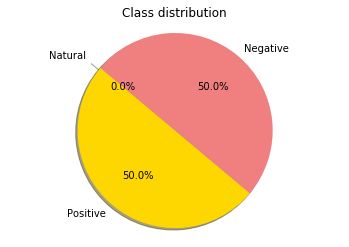

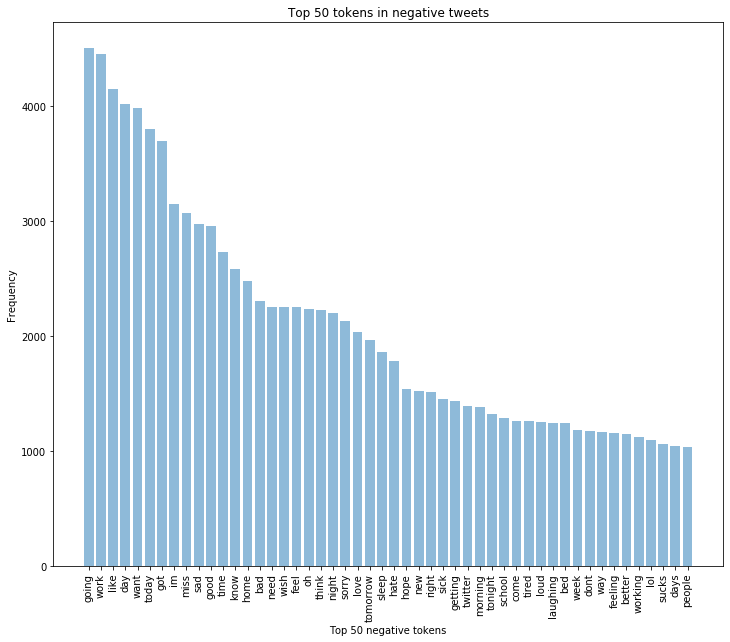

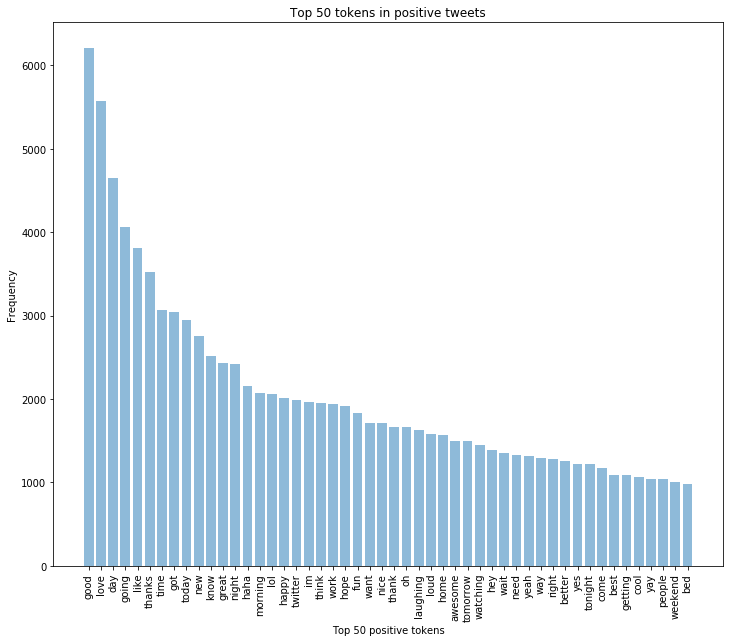

In [51]:
tokenizer = WordPunctTokenizer()
df['label'] = df.target.map(normalize_binary)
neg_df = df[df['label'] == 0] 
neg_df = neg_df.sample(n=80000, replace=False)
pos_df = df[df['label'] == 1] 
pos_df = pos_df.sample(n=80000, replace=False)
df=pd.concat([neg_df,pos_df])
explore_dataset(df)


The next cell is our tries to find more feature more than time for predicting sentiment from tweets. we were WRONG but we would like to show our way of thinking.

In [0]:
# df['length'] = df['text'].str.len()
# exclaimer = lambda x: x.count("!")
# pointer = lambda x: x.count(".")
# count_upper = lambda message: sum(1 for c in message if c.isupper())
# get_lower_upper_ration = lambda message: float((sum(1 for c in message if c.islower())) + 1) / (
#             sum(1 for c in message if c.isupper()) + 1)
# get_time = lambda x:  x.split(" ")[3].split(":")[0]
#
# def get_multiple(message):
#     count = 0
#     for i in range(len(message) - 1):
#         if message[i] == message[i + 1]:
#             count += 1
#
#     return (float(count) + 1) / (float(len(message)) + 1)
#
#
# df['exclaim'] = df.text.map(exclaimer)
# df['point'] = df.text.map(pointer)
# df['capital'] = df.text.map(count_upper)
# df['capital_lower_ration'] = df.text.map(get_lower_upper_ration)
# df['multiple'] = df.text.map(get_multiple)
# df['time'] = df.date.map(get_time)
#
# # above line will be different depending on where you saved your data, and your file name
# print(df.groupby(['target', 'time']).agg({'length': 'mean', 'exclaim':'mean', 'point':'mean', 'capital':'mean', 'capital_lower_ration':'mean', 'multiple':'mean'}))

## Question 2:

Train a machine learning model to predict the sentiment of the tweet. Evaluate two
models\approaches, and tune parameters. One of the models should be based on ‘deep learning’
approach. Evaluation metrics: accuracy. Present train and test accuracy for the different models and preprocessing combinations.

In [0]:
pipeline = Pipeline([
    ('features', FeatureUnion([
        # ('exclaim', ExclaimTransformer()),
        ('exclaim', Pipeline([
            ('column_extractor', ColumnExtractor("text")),
            ('exclaim', ExclaimTransformer()),
        ])),
        ('timeOfDay', Pipeline([
            ('column_extractor', ColumnExtractor("date")),
            ('exclaim', TimeOfDayTransformer()),
        ])),
        ('ngram_tf_idf', Pipeline([
            ('column_extractor', ColumnExtractor("text")),
            ('counts', CountVectorizer()),
            ('tf_idf', TfidfTransformer())
        ])),

    ])),

    ('clf', LogisticRegression(n_jobs=-1)),
])

parameters = {
    'features__ngram_tf_idf__counts__max_df': (0.5, 0.75),
    'features__ngram_tf_idf__counts__max_features': (5000, 10000),
    'features__ngram_tf_idf__counts__ngram_range': ((1, 1), (1, 2)),  # unigrams, bigrams ot trigrams
    'features__ngram_tf_idf__counts__preprocessor': (None, tweet_cleaner),
    'clf__penalty': ('l2', None),
}

best_score = 0
best_model = None
is_cnn_best = False

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop(labels="target", axis=1), df.target, test_size=0.2, random_state=0)

Non - Neural network model:

In [58]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
print(parameters)
grid_search.fit(X_train, y_train)
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

Performing grid search...
pipeline: ['features', 'clf']
parameters:
{'features__ngram_tf_idf__counts__max_df': (0.5, 0.75), 'features__ngram_tf_idf__counts__max_features': (5000, 10000), 'features__ngram_tf_idf__counts__ngram_range': ((1, 1), (1, 2)), 'features__ngram_tf_idf__counts__preprocessor': (None, <function tweet_cleaner at 0x7f613d565e18>), 'clf__penalty': ('l2', None)}
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 42.0min finished



Best score: 0.790
Best parameters set:
	clf__penalty: 'l2'
	features__ngram_tf_idf__counts__max_df: 0.5
	features__ngram_tf_idf__counts__max_features: 10000
	features__ngram_tf_idf__counts__ngram_range: (1, 2)
	features__ngram_tf_idf__counts__preprocessor: <function tweet_cleaner at 0x7f613d565e18>


In [60]:
print("Accuracy of test set")
grid_search_pred= grid_search.predict(X_test)
accuracy_score(y_test,grid_search_pred)

Accuracy of test set


0.79315625

Neural network model:

In [0]:
# Preprocess tweets
df['clean_text'] = df.text.map(tweet_cleaner)


In [0]:
# Split dataset
sentences_train, sentences_test, y_train, y_test = train_test_split(
    df.clean_text.values, df.label.values, test_size=0.25, random_state=1000)


In [0]:
# Fit tokenizer
model_tokenizer = Tokenizer(num_words=5000)
model_tokenizer.fit_on_texts(sentences_train)


In [0]:
# Convert text to sequence
X_train = model_tokenizer.texts_to_sequences(sentences_train)
X_test = model_tokenizer.texts_to_sequences(sentences_test)


In [0]:
vocab_size = len(model_tokenizer.word_index) + 1
maxlen = 200
embedding_dim = 100

In [0]:
# Make all tweets max size of 200 tokens. Pad shorter ones with zeros.
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [22]:
text_input_layer = layers.Input(shape=(maxlen,))
embedding_layer = layers.Embedding(vocab_size, 50)(text_input_layer)
text_layer = layers.Conv1D(256, 3, activation='relu')(embedding_layer)
text_layer = layers.MaxPooling1D(3)(text_layer)
text_layer = layers.Conv1D(256, 3, activation='relu')(text_layer)
text_layer = layers.MaxPooling1D(3)(text_layer)
text_layer = layers.Conv1D(256, 3, activation='relu')(text_layer)
text_layer = layers.MaxPooling1D(3)(text_layer)
text_layer = layers.GlobalMaxPooling1D()(text_layer)
text_layer = layers.Dense(256, activation='relu')(text_layer)
output_layer = layers.Dense(1, activation='sigmoid')(text_layer)
model = Model(text_input_layer, output_layer)


In [23]:
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 50)           3122350   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 256)          38656     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 66, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 64, 256)           196864    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 256)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 19, 256)           1968



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 120000 samples, validate on 40000 samples
Epoch 1/3





120000/120000 [==============================] - 540s 4ms/step - loss: 0.5020 - acc: 0.7468 - val_loss: 0.4539 - val_acc: 0.7870
Epoch 2/3
120000/120000 [==============================] - 538s 4ms/step - loss: 0.4219 - acc: 0.8066 - val_loss: 0.4392 - val_acc: 0.7950
Epoch 3/3
120000/120000 [==============================] - 135s 1ms/step
Training Accuracy: 0.8521
40000/40000 [==============================] - 45s 1ms/step
Testing Accuracy:  0.7891


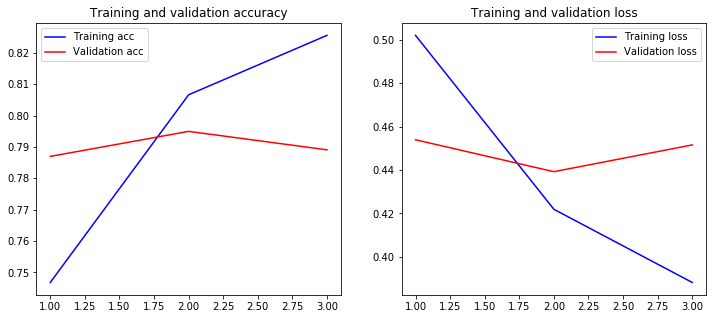

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=3,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=512)
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

if accuracy > best_score:
    best_score = accuracy
    best_model = model
    is_cnn_best = True
    

## Question 3:

do sample streaming for 15,000 tweets - checked for retweets/duplications, and only english (using several filters)

In [0]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json
import copy

In [0]:
# Variables that contains the user credentials to access Twitter API
ACCESS_TOKEN = ''
ACCESS_TOKEN_SECRET = ''
CONSUMER_KEY = ''
CONSUMER_SECRET = ''

counter = 0
tweetData = []
df_tweets = pd.DataFrame(columns = ['date', 'text', 'clean_text', 'label'])
fetched_tweets_filename = "streaming_tweets.csv"

#### Supporting class and method:

In [0]:
class TweetsListener(StreamListener):
    """
    basic listener that just prints received tweets to stdout.
    """

    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        global counter
        # 30,000 and not 15,000 because we assume that there will be tweets that are neutral that we don't want.
        if counter > 30000:
            return False
        try:
            # skip deleted tweets, response with limit and not a tweet, and retweets.
            if data.startswith('{"delete":') or data.startswith('{"limit":{') or '"text":"RT @' in data:
                return True
            tweetData.append(data)
            print('Tweet: ' + str(counter))
            counter += 1
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True

    def on_error(self, status):
        print(status)
        return False 


# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        pass

    def stream_tweets(self, fetched_tweets_filename):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        stream_listener = TweetsListener(fetched_tweets_filename)
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        stream = Stream(auth=auth, listener=stream_listener)
#         stream.sample() -- got tweets not in English...
        # take only tweets in English, must use track for free usage,
        # thats why we added the most used words in tweeter. can be found in the next link:
        # https://techland.time.com/2009/06/08/the-500-most-frequently-used-words-on-twitter/
        stream.filter(languages=["en"], track=["for", "to", "and", "is", "in", "it", "of", "a", "the", "i", "you", "u"])


def json_converter(status):
    status = json.loads(status)
    text = status['text']
    
    # Remove newlines and commas (commas will interfere with the csv file we're creating)
    text = text.replace("\r\n", " ").replace("\n", " ").replace(",", "")
    c_time = status['created_at']
    json_tweet = {"created_at": c_time, "text": text}
    return json_tweet


def to_csv_and_df(tweet_data):
    global tweetData, df_tweets
    tweets_data=tweetData

    # open a file for writing
    writing_data = open('tweetData.csv', 'w')

    # create the csv writer object
    csvwriter = csv.writer(writing_data)
    is_first = True

    for status in tweet_data:
        relevant_data_extracted = json_converter(status)
        if is_first:
             header = relevant_data_extracted.keys()
             csvwriter.writerow(header)
             is_first = False
        csvwriter.writerow(relevant_data_extracted.values())
        df_tweets = df_tweets.append({'date' : relevant_data_extracted['created_at'] , 'text' : relevant_data_extracted['text'], 'clean_text': None, 'label': None} , ignore_index=True)
    writing_data.close()
    
    
def translate_smiley_to_polarity(text):
    return str(text).count("smiley")*0.1 + str(text).count("playful")*0.05
    

##### stream tweets and save to csv only time and text.
### IN THE END, STREAM NEW TWEETS CORRECTLY AND CHECK FOR DUPLICATIONS.

In [28]:
twitter_streamer = TwitterStreamer()
twitter_streamer.stream_tweets(fetched_tweets_filename)
tweets_backup = copy.deepcopy(tweetData) # do backup so we won't need to stream again if something went wrong.
to_csv_and_df(tweetData)

Streaming output truncated to the last 5000 lines.
Tweet: 25002
Tweet: 25003
Tweet: 25004
Tweet: 25005
Tweet: 25006
Tweet: 25007
Tweet: 25008
Tweet: 25009
Tweet: 25010
Tweet: 25011
Tweet: 25012
Tweet: 25013
Tweet: 25014
Tweet: 25015
Tweet: 25016
Tweet: 25017
Tweet: 25018
Tweet: 25019
Tweet: 25020
Tweet: 25021
Tweet: 25022
Tweet: 25023
Tweet: 25024
Tweet: 25025
Tweet: 25026
Tweet: 25027
Tweet: 25028
Tweet: 25029
Tweet: 25030
Tweet: 25031
Tweet: 25032
Tweet: 25033
Tweet: 25034
Tweet: 25035
Tweet: 25036
Tweet: 25037
Tweet: 25038
Tweet: 25039
Tweet: 25040
Tweet: 25041
Tweet: 25042
Tweet: 25043
Tweet: 25044
Tweet: 25045
Tweet: 25046
Tweet: 25047
Tweet: 25048
Tweet: 25049
Tweet: 25050
Tweet: 25051
Tweet: 25052
Tweet: 25053
Tweet: 25054
Tweet: 25055
Tweet: 25056
Tweet: 25057
Tweet: 25058
Tweet: 25059
Tweet: 25060
Tweet: 25061
Tweet: 25062
Tweet: 25063
Tweet: 25064
Tweet: 25065
Tweet: 25066
Tweet: 25067
Tweet: 25068
Tweet: 25069
Tweet: 25070
Tweet: 25071
Tweet: 25072
Tweet: 25073
Tweet: 25074


##### pre-processing:


In [40]:
SMILEY = load_dict_smileys()
CONTRACTIONS = load_dict_contractions()
tokenizer = WordPunctTokenizer()

for i, row in df_tweets.iterrows():
    cleaned = tweet_cleaner(row['text'])
    df_tweets.set_value(i,'clean_text',cleaned)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


add positive/negative label for each tweet in df by using sentiment alalysis tool:
textblob gave good analysis - uses nltk library.
documentation can be found here:
https://pypi.org/project/textblob/

In [41]:
# pip install textblob
import nltk
nltk.download('punkt')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
''' each sentence have a sentiment polarity. 
    to get a final sentiment from all the tweet we will sum all the polarities 
    -> above 0 - positive (1)
    -> below 0 - negative (0)
'''
for i, row in df_tweets.iterrows():
    wiki = TextBlob(row['clean_text'])
    label = None
    polarity_sum = 0.0
    for sentence in wiki.sentences:
        polarity_sum += translate_smiley_to_polarity(sentence)
        polarity_sum += sentence.sentiment.polarity
    # negative
    if polarity_sum < 0:
        label = 0
    # positive
    if polarity_sum > 0:
        label = 1
        
    df_tweets.set_value(i,'label',label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [0]:
# remove all tweets that are neutral
for i, row in df_tweets.iterrows():
    if row['label'] is None:
        df_tweets = df_tweets.drop(i)

df_tweets.to_csv('df_tweets_full.csv')
# narrow df to 15,000 tweets
df_tweets_narrowed = df_tweets.sample(n=15000, replace=False)
df_tweets_narrowed.to_csv('df_tweets_FINAL.csv')

Class distribution: (0- Negative, 1- Positive)
1    10338
0     4662
Name: label, dtype: int64


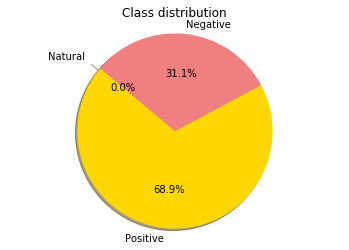

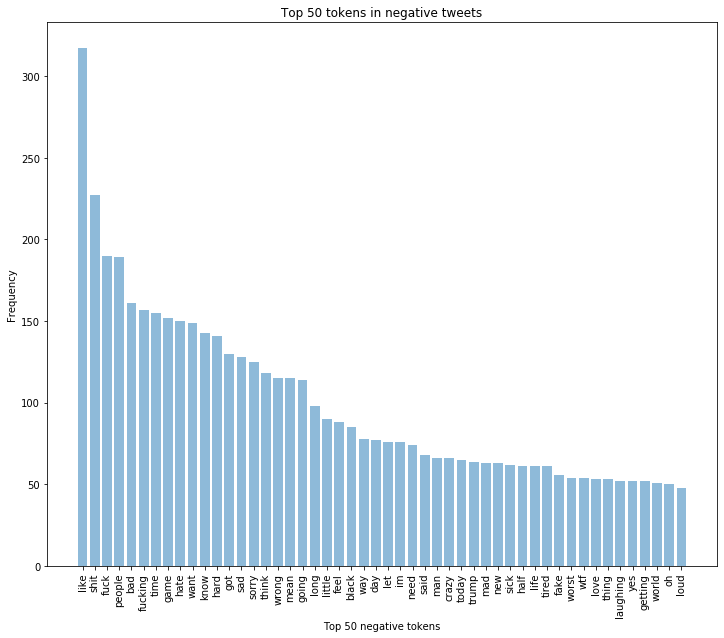

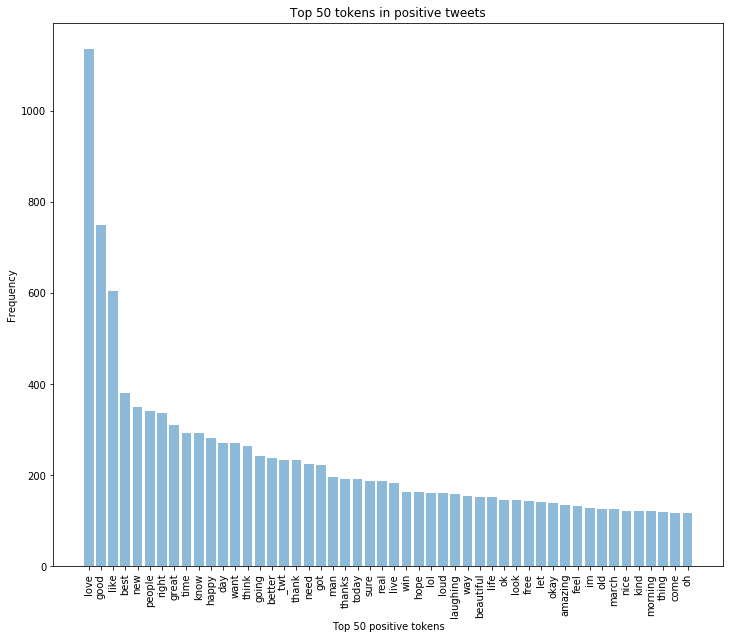

In [44]:
explore_dataset(df_tweets_narrowed)

## Question 4:

#### Supporting Methods:

In [0]:
def predict_sentiments(model):
    test_x = model_tokenizer.texts_to_sequences(df_tweets_narrowed['clean_text'])
    test_x = pad_sequences(test_x, padding='post', maxlen=200)
    test_pred = model.predict(test_x)
    i = 0
    finalans = ["Ind,Sentiment"]
    for val in test_pred:
        finalans.append(str(i) + "," + str(int(round(val[0]))))
        i += 1
    # print(finalans)

    with open("out1.csv", "w") as f:
        wr = csv.writer(f, delimiter="\n")
        wr.writerow(finalans)


In [0]:
predict_sentiments(best_model)

compering label from question 3 to prediction from question 4

In [55]:
count=0
similar=0
# colnames=['date','text','clean_text','label']
# reader1 = csv.read_csv("df_tweets_FINAL.csv", encoding='latin-1', names=colnames, header=None, engine='python',
#                       error_bad_lines=False)
# colnames=['ID','Sentiment']
# reader2 = pd.read_csv("out1.csv", encoding='latin-1', names=colnames, header=None, engine='python',
#                       error_bad_lines=False)

with open('df_tweets_FINAL.csv', 'r') as file1:
    with open('out1.csv', 'r') as file2:
      reader1 = csv.reader(file1)
      reader2=csv.reader(file2)
      next(reader1)
      next(reader2)
      for row1,row2 in zip(reader1,reader2):
          try:
            if (row1[4] == row2[1]):
              similar+=1
            count+=1
          except:
            continue

print("Accuracy of the model - based on the labels from question 3")
print(similar/count)



Accuracy of the model - based on the labels from question 3
0.6026136818242432
